<center><h1>Titanic - Kaggle Competition</h1></center>

<p>This is an introduction to data science using an IPython notebook.  Here, I explore Kaggle's titanic dataset to create predictions for passenger survival based on a variety of data features.  Approximately 2,000 people set sail on the RMS Titanic's maiden voyage in April of 1912.  On April 12, the ship hit an iceberg in the North Atlantic ocean.  Here is what Wikipedia has to say on the matter:</p>
    
   <blockquote>Of the 2,224 passengers and crew aboard, more than 1,500 died in the sinking, making it one of the deadliest commercial peacetime maritime disasters in modern history.</blockquote>
   
<center><h2>The Competition</h2></center>

Kaggle is hosting this <a href="https://www.kaggle.com/c/titanic">introductory competition</a> to get people interested and involved in data science.  In this analysis, you will use a <b>training dataset</b> to build a model that can predict passenger survival based on various attributes.  Then you will apply the model to the <b>testing dataset</b> to predict the survival of the 417 passengers in that file.  Kaggle will then evaluate your predictions using the actual survival data of the test passengers.
 
<center><h2>The Dataset</h2></center><br/>
Our training dataset will have data for 891 passengers.  The dataset has the following features:

<ul>
 <li> <b>PassengerId</b>: The identifier of the passenger on the ship</li>
 <li> <b>Survived</b>: Whether or not the passenger survived (1 = survival)</li>
 <li> <b>Pclass</b>: The passenger's class (1st, 2nd or 3rd class). </li>
 <li> <b>Name</b></li>
 <li> <b>Sex</b>: The gender of the passenger (male or female)</li>
 <li> <b>Age</b>: The age of the passenger in years.</li>
 <li> <b>SibSp</b>: How many siblings or spouses the passenger on board.</li>
 <li> <b>Parch</b>: The number of parents and children the passenger on board.</li>
 <li> <b>Ticket</b>: The ticket number for the passenger. I do not use this field.</li>
 <li> <b>Fare</b>: The fare paid by the passenger for the trip.</li>
 <li> <b>Cabin</b>: The cabin number of the passenger's room.  I do not use this field.</b>
 <li> <b>Embarked</b>: The embarkation point for the passenger ( C = Cherbourgh, Q = Queenstown, S = Southampton)</li>
 
</ul>

<p>The test dataset has all the same features, except for whether or not the passenger survived.  </p>

<br/><center><h2>The Process</h2></center><br/>

<p>In a data analysis project, there are several major steps you have to take: </p>

<ol>
    <li> Understanding the structure of your dataset</li>
    <li> Cleaning the dataset: missing values, outliers, breaking complex data into pieces</li>
    <li> Creating new data features out of the data</li>
    <li> Exploratory data analysis and visualization</li>
    <li> <b>Rinse and repeat the above steps until satisfied</b></li>
    <li> Build a predictive model</li>
    <li> Test your predictive model</li>
    <li> Optimize and choose your best model: Deciding what classifier to use, what features are important or helpful, how to optimize your classifier parameters</li>
    <li> <b>Rinse and repeat as satisfied/until you have to move onto something else</b></li>
</ol>

<p>This is an intentionally vague description, because it is a process you develop an intuition for after extended practice.  This is, after all, an introductory analysis, but should give you a clue about the major cycles that occur during the analysis process. </p>


<br/><center><h2>The Technology</h2></center><br/>
<p>I will be using an IPython3 notebook for this analysis, which is bundled with a variety of data science libraries.  The major ones are numpy, pandas, matplotlib and scikit-learn.  Numpy is used for number crunching, pandas for wrangling with datasets, matplotlib for visualizing data, and scikit-learn for building predictive models.</p>

<i><b>Now, let's take a look at some data!</b></i>

<h3>First Steps</h3>
<p>The first step is importing the libraries we need, and then reading in the data. We read in the data using the pandas <b><code>read_csv</code></b> function. We can see the first few rows of the dataset using the pandas <b><code>head</code></b> function. Or, you can see the columns of the dataset using the <b><code>columns</code></b> method of a DataFrame.</p>

In [68]:
# Standard imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
import  csv
from sklearn.ensemble import AdaBoostClassifier
np.random.seed(0) #staring random seed
from sklearn import linear_model

In [69]:
# read in the dataset
df = pd.read_csv('csvfiles/train.csv', header = 0)
test_df = pd.read_csv('csvfiles/test.csv', header = 0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Randomly order the datasets in case we want to do cross validation (not to be explained here):

In [70]:
#shuffle utility function - randomly reorder the dataset
def shuffle(dframe, n = 1, axis = 0):
    dframe = dframe.copy()
    for x in range(n):
        dframe.apply(np.random.shuffle, axis = axis)
    return dframe

df = shuffle(df)

In [71]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<h3>Basic Dataset Info</h3>

<p>We can see a high level overview of our dataset using the <b><code>info</code></b> function.  It can tell us if we have missing values in our data.  It indicates we have a significant number of missing values for <b>Age</b>, a lot of missing values for <b>Cabin</b>, and a few missing values for <b>Embarked.</b></p>

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


How many people survived?

In [73]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

So 549 died, 342 lived.  What is that, proprotionally?

In [74]:
df.Survived.value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

So 38% lived, 62% died.

<h3>Feature Exploration and Cleaning</h3>

We drop the <b>Ticket</b>, <b>Name</b> and <b>Cabin</b> columns from the data, I have decided not to use them in this analysis, for the sake of simplicity.

In [75]:
#Drop unused data
df = df.drop(['Ticket', 'Cabin'], axis = 1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis = 1)


# I forgot to drop the name column
df = df.drop('Name', axis  = 1)
test_df = test_df.drop('Name', axis = 1)



We know we are missing some data from the <b>Embarked</b> and <b>Age</b> features from our training set.  What do those rows look like?

In [76]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38.0,0,0,80.0,NaN
829,830,1,1,female,62.0,0,0,80.0,NaN


There are only two missing entries, and both are women who survived. It's possible they are related, but it's probably not worth the time exploring this further. Let's just fill those in with the mode (most common value) in the dataset. We aren't actually even missing this data from the test set.

In [82]:
mode_embarkation = df.Embarked.dropna().mode()[0]
df['Embarked'] = df.Embarked.fillna(df.Embarked.dropna().mode()[0])

In [46]:
df[df.Age.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
5,6,0,3,male,NaN,0,0,8.4583,Q,0
17,18,1,2,male,NaN,0,0,13.0000,S,0
19,20,1,3,female,NaN,0,0,7.2250,C,0
26,27,0,3,male,NaN,0,0,7.2250,C,0
28,29,1,3,female,NaN,0,0,7.8792,Q,0
29,30,0,3,male,NaN,0,0,7.8958,S,0
31,32,1,1,female,NaN,1,0,146.5208,C,1
32,33,1,3,female,NaN,0,0,7.7500,Q,0
36,37,1,3,male,NaN,0,0,7.2292,C,0
42,43,0,3,male,NaN,0,0,7.8958,C,0


That is an overwhelming amount of information in the table.  Let's look at the distribution of values for the passengers with missing <b>Age</b> data.

A summary from the some of the function calls below:

<ul>
<li>About 70% of them died</li>
<li>About 70% of them were men (hmm...)</li>
<li>Proportionally, most of missing data was from Ireland.</li>
<li>Proportionally, most missing age data is from third class, then first class.</li>
</ul>

In [99]:
df['Survived'][df.Age.isnull()].value_counts(normalize = True)

0    0.706215
1    0.293785
Name: Survived, dtype: float64

In [98]:
df['Sex'][df.Age.isnull()].value_counts(normalize = True)

male      0.700565
female    0.299435
Name: Sex, dtype: float64

In [103]:
#WLooks like France and Ireland had poorer records for passengers, divided by passenger count from each pointj
df['Embarked'][df.Age.isnull()].value_counts(normalize = True)/df['Embarked'].value_counts(normalize = True)

C    1.138620
Q    3.203390
S    0.701317
Name: Embarked, dtype: float64

In [126]:
# By class, what age data is missing?
df[df.Age.isnull()].Pclass.value_counts()

3    136
1     30
2     11
Name: Pclass, dtype: int64

In [127]:
# By class, what age data is missing?
df[df.Age.isnull()].Pclass.value_counts(normalize = True)

3    0.768362
1    0.169492
2    0.062147
Name: Pclass, dtype: float64

In [129]:
df.Pclass.value_counts(normalize = True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

So let's fill in the missing age data by the median of the passenger's sex and class group.

In [142]:
import itertools
sexes = df.Sex.unique()
classes = df.Pclass.unique()

for sex, cls in itertools.product(sexes, classes):
    median_age = df.Age.dropna()[ (df.Sex == sex) & (df.Pclass == cls)].median()
    df.Age[ (df.Sex == sex) & (df.Pclass == cls) & (df.Age.isnull()) ] = median_age

#Do the same for the test_df
for sex, cls in itertools.product(sexes, classes):
    median_age = test_df.Age.dropna()[ (test_df.Sex == sex) & (test_df.Pclass == cls)].median()
    test_df.Age[ (test_df.Sex == sex) & (test_df.Pclass == cls) & (test_df.Age.isnull()) ] = median_age
    


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


We actually have a missing entry in the Fare feature in the test dataframe. So fill it with the median of the fare, to make things simple.

In [146]:
test_df[test_df.Fare.isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,male,60.5,0,0,NaN,S


In [147]:
test_df.Fare = test_df.Fare.fillna(test_df.dropna().median())

<h3>Feature Visualization</h3>

<p> Now, let's move on to the fun stuff: visualizing some features of the data.  Maybe if we can actually see the data, we can get a better indication of how the features correlate to survival.</p>

FYI, it took darn near forever to get this graph to look OK.

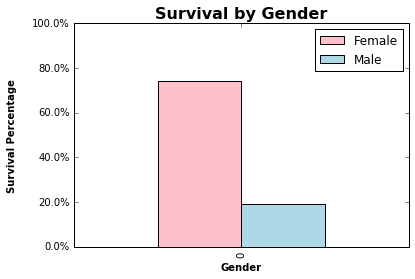

In [272]:
survived_percentage = df.groupby('Sex')['Survived'].aggregate(np.mean)
survived_percentage.reset_index()
survived_percentage = pd.DataFrame([survived_percentage.values], columns = ['Female', 'Male'])
survived_percentage.index = ['Gender']
x =survived_percentage.plot.bar(color = [ 'pink','lightblue'], use_index = False)
x.set_title('Survival by Gender', fontsize = 16, fontweight = 'bold')
x.set_ylabel('Survival Percentage', fontweight = 'bold', labelpad = 15)
x.set_xlabel("Gender", labelpad = 5, fontweight = 'bold')
x.set_ylim(0, 1)
x.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda q, pos: str(100 * q) + "%"))


Jeez, it's hard to be a guy on the Titanic.  Less than a 20% chance of survival.  It really does look like it's wome and children first.  Maybe we should take a look at class.  I would expect class to not be as strong a predictor of survival.

3 1    0.242363
0    0.757637
Name: Survived, dtype: float64
1 0    0.37037
1    0.62963
Name: Survived, dtype: float64
2 1    0.472826
0    0.527174
Name: Survived, dtype: float64


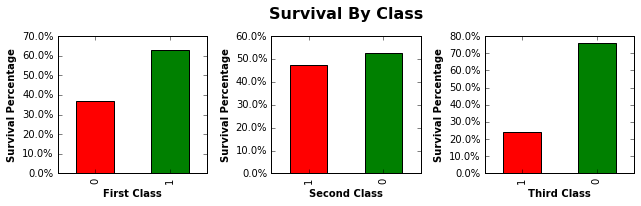

In [347]:
fig = plt.figure(1, figsize = (9,3))
classes = df.Pclass.unique()
for cls in classes:
    graph = plt.subplot(1,3,cls)
    survival_by_class = df.Survived[df.Pclass == cls].value_counts(normalize = True)
    survival_by_class = survival_by_class.sort_values(axis = 0)
    print(cls, survival_by_class)
    survival_by_class.plot.bar(color = ['red', 'green'])
    graph.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda q, pos: str(100 * q) + "%"))
    graph.set_ylabel("Survival Percentage", fontweight = 'bold')
    class_dict = {1: 'First Class', 2: 'Second Class', 3: 'Third Class'}
    graph.set_xlabel(class_dict[cls], fontweight = 'bold')
    #lt.xticks([0,1], ['Dead', 'Alive'])
    
plt.title("Survival By Class", fontsize = 16, fontweight = 'bold', y = 1.09)
plt.tight_layout()

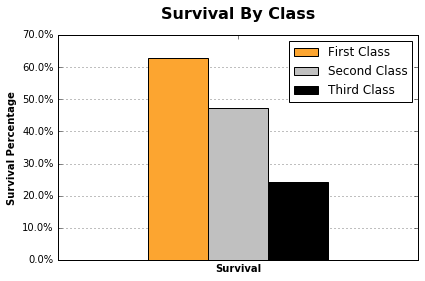

In [412]:
survival_by_class = {}
for cls in sorted(df.Pclass.unique()):
    survival_by_class[cls] = np.sum(df.Survived[df.Pclass == cls])/(df.Pclass == cls).sum()
df_class_survival = pd.DataFrame([[survival_by_class[1], survival_by_class[2], survival_by_class[3]]], \
                                columns = ['First Class', 'Second Class', 'Third Class'])
gold = '#Fca530'
silver = "#c0c0c0"

graph = df_class_survival.plot.bar(color = [gold, silver, 'black'], zorder = 5)
plt.title("Survival By Class", fontsize = 16, fontweight = 'bold', y = 1.05)

graph.set_ylabel("Survival Percentage", fontweight = 'bold')
plt.xticks([0], ['Survival'], rotation = 0, fontweight = 'bold')
graph.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda q, pos: str(100 * q) + "%"))
graph.grid(b = True, zorder = 0, axis = 'y', alpha = 1)
plt.tight_layout()
plt.show()

<h3>Feature Engineering/Creation</h3>

In [43]:
# Creation of new feature - family size
df['Family'] = df.SibSp + df.Parch
test_df['Family'] = test_df.SibSp + df.Parch

In [9]:
#create gender variable
df['Gender'] = df.Sex.map({'male': 0, 'female': 1})
test_df['Gender'] = test_df.Sex.map({'male': 0, 'female': 1})

In [10]:
df = df.drop('Sex', axis = 1)
test_df = test_df.drop('Sex', axis = 1)

In [11]:
# Graphic- where did people embark?
embarkations = df.groupby('Embarked')
embarkations.aggregate(np.size)['PassengerId']

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [12]:
#What proportion of passengers survived from each port of embarkation?
embarkations.aggregate(np.sum)['Survived'] / embarkations.aggregate(np.size)['PassengerId']

Embarked
C    0.553571
Q    0.389610
S    0.336957
dtype: float64

In [13]:
# Data says that ppl with missing embarkation survived - maybe fill with C
df.Embarked = df.Embarked.fillna('C')
test_df.Embarked = test_df.Embarked.fillna('C')

In [14]:
#Replace Embarked data as numeric - C = 0, Q = 1, S = 2
df.Embarked = df.Embarked.map({'C': 0, 'Q': 1, 'S': 2}).astype(np.int)
test_df.Embarked = test_df.Embarked.map({'C': 0, 'Q': 1, 'S': 2}).astype(np.int)

In [15]:
test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Family,Gender
0,892,3,34.5,0,0,7.8292,1,0.0,0
1,893,3,47.0,1,0,7.0000,2,1.0,1
2,894,2,62.0,0,0,9.6875,1,0.0,0
3,895,3,27.0,0,0,8.6625,2,0.0,0
4,896,3,22.0,1,1,12.2875,2,1.0,1


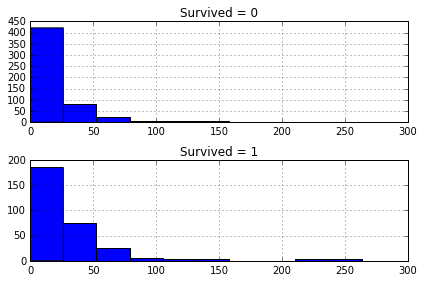

In [16]:
# What does the distribution of fare vs survival look like?
plt.figure(1)
for x in (0,1):
    plt.subplot(2,1,x + 1)
    fig = df.Fare[df.Survived == x & (df.Fare < df.Fare.quantile(q = .75))].hist()
    fig.set_title("Survived = {0}".format(x))
    plt.tight_layout()

In [17]:
# What are counts of survival by class?
survival_by_class = df.groupby('Pclass').aggregate(np.sum)
survival_by_class['Survived']

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

It looks like people in first class survived more in total numbers.  I expect there to be significantly fewer people there as well.

In [18]:
survival_by_class_proportions = df.groupby('Pclass').aggregate(np.mean)
survival_by_class_proportions.Survived

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

It looks like people in first class had more than double the survival rate of people in third class. Second class was about double the rate of third class as well.  We might predict ppl in second class to survive.

In [19]:
# What does survival look like by gender?
survival_by_gender = df.groupby('Gender').aggregate(np.mean)
survival_by_gender.Survived

Gender
0    0.188908
1    0.742038
Name: Survived, dtype: float64

Men survived about 19% of the time, where women survived about 74% of the time.  It really goes to show, women and children first.  Which brings me to the next question, what does survival look like when considering age?

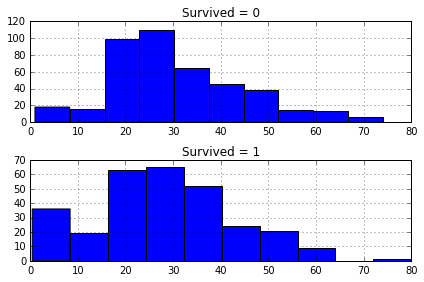

In [20]:
# What does the distribution of age vs survival look like?
plt.figure(1)
for x in (0,1):
    plt.subplot(2,1,x + 1)
    fig = df.Age.dropna()[df.Survived == x].hist()
    fig.set_title("Survived = {0}".format(x))
    plt.tight_layout()

The shapes look pretty similar, but it looks like more children and adults in their 30s and 40s survived proportionally than the rest of the population.

In [21]:
# Age IQR for the dead
dead_ages = [df.Age.dropna()[df.Survived == 0].quantile( q =.25), df.Age.dropna()[df.Survived == 0].median(), \
             df.Age.dropna()[df.Survived == 0].quantile(q = .75)]
dead_ages

[21.0, 28.0, 39.0]

In [22]:
# Age IQR for the dead
living = [df.Age.dropna()[df.Survived == 1].quantile( q =.25), df.Age.dropna()[df.Survived ==1].median(), \
             df.Age.dropna()[df.Survived == 1].quantile(q = .75)]
living

[19.0, 28.0, 36.0]

The living are on average about 2 to 3 years younger than the dead. Hopefully an SVM classifier picks that up.

In [23]:
# How about gender and class effect on survival
df.groupby(['Gender', 'Pclass']).aggregate(np.mean).Survived

Gender  Pclass
0       1         0.368852
        2         0.157407
        3         0.135447
1       1         0.968085
        2         0.921053
        3         0.500000
Name: Survived, dtype: float64

Men in the upper class still did not have a good chance for survival.

In [24]:
# Feature normalization
df.Age = (df.Age - df.Age.mean())/df.Age.std()
df.Fare = (df.Fare - df.Fare.mean()) / df.Fare.std()

test_df.Age = (test_df.Age - test_df.Age.mean())/test_df.Age.std()
test_df.Fare = (test_df.Fare - test_df.Fare.mean()) / test_df.Fare.std()

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Family', 'Gender'],
      dtype='object')

In [26]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Family', 'Gender'],
      dtype='object')

In [27]:
# Fill in misisng age data - age of person is median of group in same class and gender
import itertools
age_by_class_gender = df.dropna().groupby(['Pclass', 'Gender']).aggregate(np.median).reset_index()
pclasses = (1,2,3)
genders = (0,1)
for (a,b) in itertools.product(pclasses, genders):
   new_age = age_by_class_gender[(age_by_class_gender.Pclass == a) & (age_by_class_gender.Gender == b)].Age.median()
   df.Age[(df.Gender == b) & (df.Pclass == a)] = new_age

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [28]:
# Do the same with the test_df
age_by_class_gender = test_df.dropna().groupby(['Pclass', 'Gender']).aggregate(np.median).reset_index()
for (a,b) in itertools.product(pclasses, genders):
   new_age = age_by_class_gender[(age_by_class_gender.Pclass == a) & (age_by_class_gender.Gender == b)].Age.median()
   test_df.Age[(test_df.Gender == b) & (test_df.Pclass == a)] = new_age

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [29]:
#Fix the missing fare for the test_df data
test_df.Fare[test_df.Fare.isnull()] = test_df.Fare.dropna().median()

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [30]:
# Drop passenger ID data
#df_survived = df.Survived
#df = df.drop('Survived', axis = 1)
pass_ids = test_df['PassengerId']
df = df.drop('PassengerId', axis = 1)
test_df = test_df.drop('PassengerId', axis = 1)

In [31]:
# Start doing the classification
from sklearn.svm import SVC
clf = AdaBoostClassifier( n_estimators = 100)
df_values = df.values
survival_values = df_survived.values
clf.fit(df_values, survival_values)

NameError: name 'df_survived' is not defined

In [ ]:
predictions = clf.predict(test_df.values)

In [ ]:
pass_ids

In [ ]:
writeout_frame = pd.DataFrame({'PassengerId': pass_ids.values, 'Survived': predictions})

In [ ]:
writeout_frame[['PassengerId', 'Survived']].to_csv('survival_predictions.csv', index = False)